# Object Oriented Programming

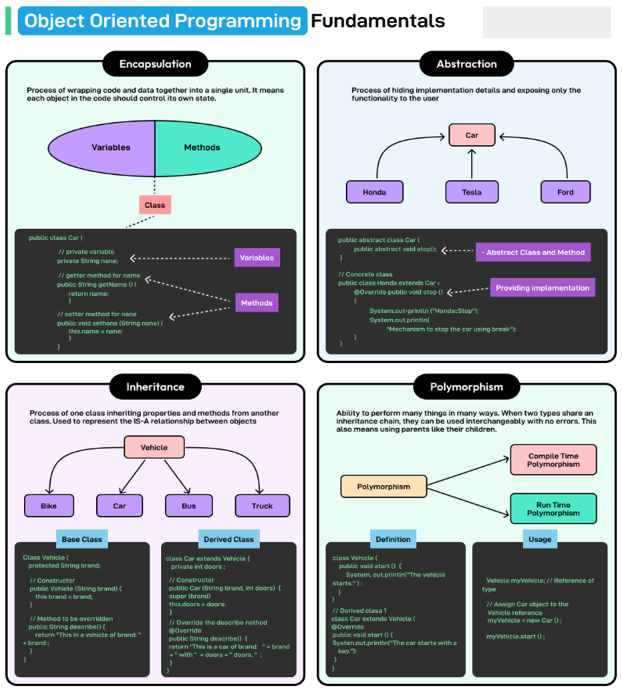

# 1. Define the classes

Classes (Car, SportsCar, ElectricCar): We define blueprints for different types of vehicles. Each class specifies the properties (like brand, model, color) and behaviors (like start_engine, accelerate) that objects created from that blueprint will have.

In [8]:
import time

# 1. The Blueprint (Class) - Car
class Car:
    """
    This is the blueprint for a generic Car.
    It defines what every car will have (attributes) and what it can do (methods).
    """
    def __init__(self, brand, model, color, max_speed_kmph, fuel_type="Petrol"):
        # These are the car's attributes (data)
        self.brand = brand
        self.model = model
        self.color = color
        self.max_speed_kmph = max_speed_kmph
        self.fuel_type = fuel_type
        self.__current_speed = 0  # Encapsulated: private attribute (conventionally)
        self.__engine_on = False  # Encapsulated: private attribute

        print(f"[{self.brand} {self.model}] Car created: {self.color}")

    # These are the car's methods (actions)
    def start_engine(self):
        """Action: Starts the car's engine."""
        if not self.__engine_on:
            print(f"[{self.brand} {self.model}] Starting {self.fuel_type} engine...")
            self.__engine_on = True
            print(f"[{self.brand} {self.model}] Engine is running.")
        else:
            print(f"[{self.brand} {self.model}] Engine is already on.")

    def stop_engine(self):
        """Action: Stops the car's engine."""
        if self.__engine_on:
            if self.__current_speed > 0:
                print(f"[{self.brand} {self.model}] Cannot stop engine while moving! Please brake first.")
            else:
                print(f"[{self.brand} {self.model}] Stopping engine.")
                self.__engine_on = False
                print(f"[{self.brand} {self.model}] Engine is off.")
        else:
            print(f"[{self.brand} {self.model}] Engine is already off.")

    def accelerate(self, speed_increase):
        """Action: Increases the car's speed."""
        if not self.__engine_on:
            print(f"[{self.brand} {self.model}] Cannot accelerate, engine is off!")
            return

        new_speed = self.__current_speed + speed_increase
        if new_speed > self.max_speed_kmph:
            self.__current_speed = self.max_speed_kmph
            print(f"[{self.brand} {self.model}] Accelerating! Reached max speed: {self.__current_speed} kmph.")
        else:
            self.__current_speed = new_speed
            print(f"[{self.brand} {self.model}] Accelerating! Current speed: {self.__current_speed} kmph.")

    def brake(self, speed_decrease):
        """Action: Decreases the car's speed."""
        if self.__current_speed <= 0:
            print(f"[{self.brand} {self.model}] Car is already stopped.")
            self.__current_speed = 0
            return

        new_speed = self.__current_speed - speed_decrease
        if new_speed < 0:
            self.__current_speed = 0
            print(f"[{self.brand} {self.model}] Braking! Car stopped.")
        else:
            self.__current_speed = new_speed
            print(f"[{self.brand} {self.model}] Braking! Current speed: {self.__current_speed} kmph.")

    # Abstraction: A simplified way to check status
    def get_status(self):
        """Provides a simple summary of the car's current status."""
        engine_status = "on" if self.__engine_on else "off"
        return f"[{self.brand} {self.model}] Status: Engine {engine_status}, Speed {self.__current_speed} kmph."

In [9]:
# Building on Existing Designs (Inheritance) - SportsCar

class SportsCar(Car):
    """
    Blueprint for a Sports Car, inheriting from Car.
    It adds specific sports car features.
    """
    def __init__(self, brand, model, color, max_speed_kmph, spoiler_type="Fixed"):
        # Call the parent Car's constructor to initialize common attributes
        super().__init__(brand, model, color, max_speed_kmph, fuel_type="High-Octane Petrol")
        self.spoiler_type = spoiler_type
        self.__nitro_boost_active = False # Encapsulated: specific to sports car
        print(f"[{self.brand} {self.model}] Sports car feature: {self.spoiler_type} spoiler.")

    def activate_nitro_boost(self):
        """Action: Activates nitro boost for extra speed."""
        if self.__engine_on and not self.__nitro_boost_active:
            print(f"[{self.brand} {self.model}] Activating NITRO BOOST! VROOOM!")
            self.__nitro_boost_active = True
            self.accelerate(50) # Instantly gain more speed
        elif self.__nitro_boost_active:
            print(f"[{self.brand} {self.model}] Nitro boost already active.")
        else:
            print(f"[{self.brand} {self.model}] Cannot activate nitro, engine is off.")

    def deactivate_nitro_boost(self):
        """Action: Deactivates nitro boost."""
        if self.__nitro_boost_active:
            print(f"[{self.brand} {self.model}] Deactivating nitro boost.")
            self.__nitro_boost_active = False
        else:
            print(f"[{self.brand} {self.model}] Nitro boost not active.")

    # Polymorphism: Sports cars might start their engine a bit differently
    def start_engine(self):
        """Overriding parent method: Sports car engine start."""
        if not self._Car__engine_on: # Accessing parent's private attribute (conventionally)
            print(f"[{self.brand} {self.model}] Roaring to life with a sports engine sound!")
            super().start_engine() # Call the parent's start_engine method
        else:
            print(f"[{self.brand} {self.model}] Engine is already on (sports car purr).")

In [10]:
# Different Cars, Same Command (Polymorphism) - ElectricCar

class ElectricCar(Car):
    """
    Blueprint for an Electric Car, also inheriting from Car.
    It has different ways of starting/stopping and fuel.
    """
    def __init__(self, brand, model, color, max_speed_kmph, battery_capacity_kwh):
        super().__init__(brand, model, color, max_speed_kmph, fuel_type="Electricity")
        self.battery_capacity_kwh = battery_capacity_kwh
        self.__current_charge = battery_capacity_kwh # Starts full
        print(f"[{self.brand} {self.model}] Electric car feature: {self.battery_capacity_kwh} kWh battery.")

    def charge_battery(self, kwh_to_add):
        """Action: Charges the battery."""
        if self.__current_charge < self.battery_capacity_kwh:
            self.__current_charge = min(self.battery_capacity_kwh, self.__current_charge + kwh_to_add)
            print(f"[{self.brand} {self.model}] Charging battery. Current charge: {self.__current_charge} kWh.")
        else:
            print(f"[{self.brand} {self.model}] Battery already full.")

    # Polymorphism: Electric cars start their engine differently
    def start_engine(self):
        """Overriding parent method: Electric car engine start."""
        if not self._Car__engine_on:
            if self.__current_charge > 0:
                print(f"[{self.brand} {self.model}] Activating electric motor... (silent hum).")
                self._Car__engine_on = True # Directly set parent's private attribute
                print(f"[{self.brand} {self.model}] Electric motor is ready.")
            else:
                print(f"[{self.brand} {self.model}] Cannot start, battery is empty!")
        else:
            print(f"[{self.brand} {self.model}] Electric motor is already active.")

    # Polymorphism: Electric cars stop their engine differently
    def stop_engine(self):
        """Overriding parent method: Electric car engine stop."""
        if self._Car__engine_on:
            if self._Car__current_speed > 0:
                print(f"[{self.brand} {self.model}] Cannot stop motor while moving! Please brake first.")
            else:
                print(f"[{self.brand} {self.model}] Deactivating electric motor.")
                self._Car__engine_on = False
                print(f"[{self.brand} {self.model}] Electric motor is off.")
        else:
            print(f"[{self.brand} {self.model}] Electric motor is already off.")

    def get_status(self):
        """Provides a simple summary of the electric car's current status."""
        base_status = super().get_status()
        return f"{base_status} Battery: {self.__current_charge} kWh."

# 2. Creating Instances

Objects (my_honda, your_thar, a_ferrari, our_tesla): These are actual instances created from the Car, SportsCar, and ElectricCar blueprints. Each object is a unique entity with its own specific data (e.g., my_honda is "Red", your_thar is "Blue")

In [11]:
# --- The Main Program (Managing the Fleet of Vehicles) ---

print("--- Designing and Manufacturing Vehicles (OOP Style) ---\n")

# 2. The Actual Vehicles (Objects) - Creating Instances
my_honda = Car("Honda", "City", "Red", 180)
your_thar = Car("Mahindra", "Thar", "Blue", 150)
a_ferrari = SportsCar("Ferrari", "SF90", "Yellow", 340, "Active Rear")
our_tesla = ElectricCar("Tesla", "Model 3", "White", 225, 75)

--- Designing and Manufacturing Vehicles (OOP Style) ---

[Honda City] Car created: Red
[Mahindra Thar] Car created: Blue
[Ferrari SF90] Car created: Yellow
[Ferrari SF90] Sports car feature: Active Rear spoiler.
[Tesla Model 3] Car created: White
[Tesla Model 3] Electric car feature: 75 kWh battery.


# 3. Demonstrating Encapsulation

Encapsulation:

* Notice attributes like __current_speed and __engine_on (the double underscore __ is a Python convention indicating "private" or "encapsulated" attributes).
* You can't directly change my_honda.__current_speed = 500 from outside the Car class easily (Python technically allows it but it's strongly discouraged and makes the name "mangled"). You have to use methods like accelerate() or brake() to modify the speed, which ensures that the car's state changes in a controlled and valid way.

In [12]:
# Demonstrating Encapsulation and Methods

print("--- My Honda City Actions ---")
print(my_honda.get_status()) # Abstraction: getting simple status
my_honda.accelerate(50) # Cannot accelerate without engine on
my_honda.start_engine()
my_honda.accelerate(60)
my_honda.accelerate(100)
my_honda.brake(30)
my_honda.stop_engine()
my_honda.stop_engine() # Already off
# my_honda.__current_speed = 500 # This would be prevented by encapsulation (conventionally)

print("\n--- Your Mahindra Thar Actions ---")
your_thar.start_engine()
your_thar.accelerate(80)
your_thar.brake(80)
your_thar.stop_engine()

--- My Honda City Actions ---
[Honda City] Status: Engine off, Speed 0 kmph.
[Honda City] Cannot accelerate, engine is off!
[Honda City] Starting Petrol engine...
[Honda City] Engine is running.
[Honda City] Accelerating! Current speed: 60 kmph.
[Honda City] Accelerating! Current speed: 160 kmph.
[Honda City] Braking! Current speed: 130 kmph.
[Honda City] Cannot stop engine while moving! Please brake first.
[Honda City] Cannot stop engine while moving! Please brake first.

--- Your Mahindra Thar Actions ---
[Mahindra Thar] Starting Petrol engine...
[Mahindra Thar] Engine is running.
[Mahindra Thar] Accelerating! Current speed: 80 kmph.
[Mahindra Thar] Braking! Current speed: 0 kmph.
[Mahindra Thar] Stopping engine.
[Mahindra Thar] Engine is off.


# 4. Demonstrating Inheritance and Polymorphism

Inheritance:

* SportsCar(Car): The SportsCar class inherits from Car. This means SportsCar objects automatically get all the attributes (like brand, model, color) and methods (like accelerate, brake, stop_engine) that a Car has. We don't have to rewrite them.
* ElectricCar(Car): Similarly, ElectricCar also inherits from Car.
* super().__init__(): Inside SportsCar and ElectricCar's __init__ methods, super().__init__(...) calls the Car class's constructor to handle the initialization of common car attributes.

In [16]:
# Demonstrating Inheritance and Polymorphism

print("\n--- A Ferrari SF90 Actions (Sports Car) ---")
print(a_ferrari.get_status())
a_ferrari.start_engine() # Notice the different start message (Polymorphism)
a_ferrari.accelerate(150)
# a_ferrari.activate_nitro_boost() # New method specific to SportsCar
a_ferrari.deactivate_nitro_boost()
a_ferrari.brake(100)
a_ferrari.stop_engine()


--- A Ferrari SF90 Actions (Sports Car) ---
[Ferrari SF90] Status: Engine on, Speed 300 kmph.
[Ferrari SF90] Engine is already on (sports car purr).
[Ferrari SF90] Accelerating! Reached max speed: 340 kmph.
[Ferrari SF90] Nitro boost not active.
[Ferrari SF90] Braking! Current speed: 240 kmph.
[Ferrari SF90] Cannot stop engine while moving! Please brake first.


# Demonstrating Polymorphism

Polymorphism:

Both SportsCar and ElectricCar have their own start_engine() method. Even though they all inherit from Car (which also has a start_engine() method), they override it to provide their own specific behavior (e.g., "Roaring to life!" vs. "silent hum").
When we loop through the fleet and call car.start_engine(), each object responds in its own unique way, demonstrating polymorphism. The same command (start_engine()) behaves differently depending on the type of car (object).

Abstraction:

The get_status() method provides a simplified view of the car's state without exposing the internal __current_speed or __engine_on variables directly. You just ask for the status, and the car provides a summary.

In [14]:
# Demonstrating Polymorphism with Electric Car
print("\n--- Our Tesla Model 3 Actions (Electric Car) ---")
print(our_tesla.get_status())
our_tesla.start_engine() # Notice the silent hum (Polymorphism)
our_tesla.accelerate(80)
our_tesla.brake(80)
our_tesla.stop_engine()
print(our_tesla.get_status())
our_tesla.charge_battery(50) # New method specific to ElectricCar
print(our_tesla.get_status())

# Demonstrating Polymorphism on a list of cars (common interface)
print("\n--- Starting all cars in the fleet (Polymorphism in action) ---")
fleet = [my_honda, your_thar, a_ferrari, our_tesla]
for car in fleet:
    car.start_engine() # Each car responds in its own specific way!
    time.sleep(0.5) # A small pause for readability

print("\n--- Vehicle Management Complete ---")


--- Our Tesla Model 3 Actions (Electric Car) ---
[Tesla Model 3] Status: Engine off, Speed 0 kmph. Battery: 75 kWh.
[Tesla Model 3] Activating electric motor... (silent hum).
[Tesla Model 3] Electric motor is ready.
[Tesla Model 3] Accelerating! Current speed: 80 kmph.
[Tesla Model 3] Braking! Current speed: 0 kmph.
[Tesla Model 3] Deactivating electric motor.
[Tesla Model 3] Electric motor is off.
[Tesla Model 3] Status: Engine off, Speed 0 kmph. Battery: 75 kWh.
[Tesla Model 3] Battery already full.
[Tesla Model 3] Status: Engine off, Speed 0 kmph. Battery: 75 kWh.

--- Starting all cars in the fleet (Polymorphism in action) ---
[Honda City] Engine is already on.
[Mahindra Thar] Starting Petrol engine...
[Mahindra Thar] Engine is running.
[Ferrari SF90] Engine is already on (sports car purr).
[Tesla Model 3] Activating electric motor... (silent hum).
[Tesla Model 3] Electric motor is ready.

--- Vehicle Management Complete ---


# COMPLETED